In [1]:
# Intractive notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns",50)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold,RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score,auc,recall_score,precision_score,precision_recall_curve,confusion_matrix,\
plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,classification_report,roc_auc_score,f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.linear_model import LogisticRegression

In [2]:
train_data=pd.read_excel("Modified_train.xlsx",index=False)
train_data.drop(train_data.columns[0],axis=1,inplace=True)

In [3]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_C', 'ApplicantIncome_C', 'CoapplicantIncome_C',
       'Loan_Amount_Term_C'],
      dtype='object')

In [4]:
test_data=pd.read_excel("Modified_test.xlsx")
test_data.drop(test_data.columns[0],axis=1,inplace=True)

In [5]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_C',
       'ApplicantIncome_C', 'CoapplicantIncome_C', 'Loan_Amount_Term_C'],
      dtype='object')

<h2><i><b><center><font size="6" face="Ribbon" color="bronze">One hot encoding</font></center></b></i></h2>

In [6]:
train_data.dtypes

Loan_ID                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term         int64
Credit_History         float64
Property_Area           object
Loan_Status              int64
LoanAmount_C            object
ApplicantIncome_C       object
CoapplicantIncome_C     object
Loan_Amount_Term_C      object
dtype: object

In [7]:
target = 'Loan_Status'
obj_cols = train_data.head().select_dtypes('O').columns # O means object
obj_cols = [i for  i in obj_cols if i not in [target,'Loan_ID']] # removing target and loan id from obj columns as they are not vars
obj_cols
num_cols = train_data.head().select_dtypes('number').columns # O means object
num_cols= [i for  i in num_cols if i not in [target,'Loan_ID']] # removing target and loan id from obj columns as they are not vars
num_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'LoanAmount_C',
 'ApplicantIncome_C',
 'CoapplicantIncome_C',
 'Loan_Amount_Term_C']

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [8]:
ohe_cols = list(num_cols) +list(obj_cols) 
ohe_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'LoanAmount_C',
 'ApplicantIncome_C',
 'CoapplicantIncome_C',
 'Loan_Amount_Term_C']

In [9]:
dvec = DictVectorizer(sparse=False)
train_dvec = dvec.fit_transform(train_data[ohe_cols].transpose().to_dict().values()) #train_data[list(num_cols) +list(obj_cols)]
train = pd.DataFrame(train_dvec, index = train_data.index, columns = dvec.get_feature_names())

In [10]:
features=train.columns
features

Index(['ApplicantIncome', 'ApplicantIncome_C=high', 'ApplicantIncome_C=low',
       'ApplicantIncome_C=medium', 'ApplicantIncome_C=very high',
       'ApplicantIncome_C=very low', 'CoapplicantIncome',
       'CoapplicantIncome_C=high', 'CoapplicantIncome_C=low',
       'CoapplicantIncome_C=medium', 'CoapplicantIncome_C=very high',
       'CoapplicantIncome_C=very low', 'Credit_History', 'Dependents=0',
       'Dependents=1', 'Dependents=2', 'Dependents=3+', 'Education=Graduate',
       'Education=Not Graduate', 'Gender=Female', 'Gender=Male', 'LoanAmount',
       'LoanAmount_C=high', 'LoanAmount_C=low', 'LoanAmount_C=medium',
       'LoanAmount_C=very low', 'Loan_Amount_Term', 'Loan_Amount_Term_C=high',
       'Loan_Amount_Term_C=low', 'Loan_Amount_Term_C=medium',
       'Loan_Amount_Term_C=very low', 'Married=No', 'Married=Yes',
       'Property_Area=Rural', 'Property_Area=Semiurban', 'Property_Area=Urban',
       'Self_Employed=No', 'Self_Employed=Yes'],
      dtype='object')

In [11]:
test_dvec = dvec.transform(test_data[ohe_cols].transpose().to_dict().values())
test = pd.DataFrame(test_dvec, index = test_data.index, columns = dvec.get_feature_names())

<h2><i><b><center><font size="6" face="Ribbon" color="bronze">Modelling</font></center></b></i></h2>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train[features],train_data.Loan_Status,test_size = 0.25,\
                                                    random_state =61, stratify = train_data.Loan_Status)

In [13]:
X_train.shape, X_test.shape

((460, 38), (154, 38))

In [14]:
y_train.value_counts(normalize = True)

1    0.686957
0    0.313043
Name: Loan_Status, dtype: float64

In [15]:
train_data.shape

(614, 17)

In [16]:
train.columns

Index(['ApplicantIncome', 'ApplicantIncome_C=high', 'ApplicantIncome_C=low',
       'ApplicantIncome_C=medium', 'ApplicantIncome_C=very high',
       'ApplicantIncome_C=very low', 'CoapplicantIncome',
       'CoapplicantIncome_C=high', 'CoapplicantIncome_C=low',
       'CoapplicantIncome_C=medium', 'CoapplicantIncome_C=very high',
       'CoapplicantIncome_C=very low', 'Credit_History', 'Dependents=0',
       'Dependents=1', 'Dependents=2', 'Dependents=3+', 'Education=Graduate',
       'Education=Not Graduate', 'Gender=Female', 'Gender=Male', 'LoanAmount',
       'LoanAmount_C=high', 'LoanAmount_C=low', 'LoanAmount_C=medium',
       'LoanAmount_C=very low', 'Loan_Amount_Term', 'Loan_Amount_Term_C=high',
       'Loan_Amount_Term_C=low', 'Loan_Amount_Term_C=medium',
       'Loan_Amount_Term_C=very low', 'Married=No', 'Married=Yes',
       'Property_Area=Rural', 'Property_Area=Semiurban', 'Property_Area=Urban',
       'Self_Employed=No', 'Self_Employed=Yes'],
      dtype='object')

<h2><i><b><center><font size="6" face="Ribbon" color="bronze">Logistic Regression</font></center></b></i></h2>

In [17]:
scl = StandardScaler()
logreg = LogisticRegression()

In [18]:
features_lr = features

In [19]:
from sklearn.pipeline import make_pipeline,Pipeline
pipe = Pipeline([('sc', scl), ('lr', logreg)])
#pipe[0]
#pipe[1]

In [20]:
pipe.fit(X_train[features_lr], y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

<h2><i><b><center><font size="5" face="Ribbon" color="bronze">Logistic Regression metrics</font></center></b></i></h2>

In [21]:
estimator= pipe
pred_bin_tr = estimator.predict(X_train[features_lr])
pred_bin_te = estimator.predict(X_test[features_lr])
#confusion_matrix(y_train,pred_bin_tr)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train[features_lr])[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test[features_lr])[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 0.8406293952180028 ; test_roca : 0.695558176100629'

'train_f1_s : 0.8837876614060259 ; test_f1_s : 0.8630705394190871'

'train_prec : 0.8083989501312336 ; test_prec : 0.7703703703703704'

'train_reca : 0.9746835443037974 ; test_reca : 0.9811320754716981'

'train_accu : 0.8239130434782609 ; test_accu : 0.7857142857142857'

'train_conf : [[ 71  73]\n [  8 308]] ; test_conf : [[ 17  31]\n [  2 104]]'

<h2><i><b><font size="5" face="Ribbon" color="black">Important features</font></b></i></h2>

In [22]:
def logreg_coef(model,data):    
    """
    Gives the intercepts and coefficients along with variable names for logistic regression.
    model : name of the logistic model
    data :  data on which logistic model was fit, column order must be same as that of the
            data on which model was fit
    """
    intercept = pd.DataFrame({'variable' : 'intercept', 'coefficient' : model.intercept_})
    coefficient = pd.DataFrame({'variable' : data.columns, 'coefficient' : model.coef_.transpose().flatten()})
    coefficient = coefficient.reindex(coefficient.coefficient.abs().sort_values(ascending = False).index)
    return(pd.concat([intercept,coefficient], axis = 0).reset_index(drop = True))


In [23]:
#to check the important features
print(logreg_coef(pipe[1],X_train))

                         variable  coefficient
0                       intercept     0.872801
1                  Credit_History     1.498386
2               CoapplicantIncome    -0.704290
3         Loan_Amount_Term_C=high    -0.440782
4                Loan_Amount_Term     0.429715
5   CoapplicantIncome_C=very high     0.359893
6    CoapplicantIncome_C=very low    -0.297924
7         Property_Area=Semiurban     0.291312
8                      LoanAmount    -0.282648
9          Loan_Amount_Term_C=low     0.272574
10            Property_Area=Rural    -0.199269
11                   Dependents=2     0.192005
12                   Dependents=1    -0.177462
13    Loan_Amount_Term_C=very low     0.175146
14              LoanAmount_C=high     0.149290
15    ApplicantIncome_C=very high     0.146703
16                     Married=No    -0.132682
17                    Married=Yes     0.132682
18     CoapplicantIncome_C=medium     0.126807
19            Property_Area=Urban    -0.114789
20     Applic

<h2><i><b><center><font size="6" face="Ribbon" color="bronze">Selective logistic Regression</font></center></b></i></h2>

In [24]:
scl_s = StandardScaler()
logreg_s = LogisticRegression()# 'balanced'

<h2><i><b><center><font size="4" face="Ribbon" color="black">Selecting features with 5% and above importance</font></center></b></i></h2>

In [25]:
#taking top 15 features with 5% importance
features_lr1 = ['Credit_History','CoapplicantIncome','Loan_Amount_Term_C=high',
                'Loan_Amount_Term','CoapplicantIncome_C=very high','CoapplicantIncome_C=very low',
                'Property_Area=Semiurban','LoanAmount','Loan_Amount_Term_C=low','Property_Area=Rural',
                'Dependents=2','Dependents=1','Loan_Amount_Term_C=very low','LoanAmount_C=high',
                'ApplicantIncome_C=very high','Married=Yes','Married=No','CoapplicantIncome_C=medium',
                'Property_Area=Urban','ApplicantIncome_C=very low','Education=Not Graduate','Education=Graduate',
                'Loan_Amount_Term_C=medium','CoapplicantIncome_C=high']

In [26]:
pipe = Pipeline([('sc', scl_s), ('lr', logreg_s)])
#pipe[0]
#pipe[1]

In [27]:
pipe.fit(X_train[features_lr1], y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

<h2><i><b><center><font size="5" face="Ribbon" color="bronze">Selective logistic Regression metrics</font></center></b></i></h2>

In [28]:
estimator= pipe
pred_bin_tr = estimator.predict(X_train[features_lr1])
pred_bin_te = estimator.predict(X_test[features_lr1])
#confusion_matrix(y_train,pred_bin_tr)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train[features_lr1])[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test[features_lr1])[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'


'train_roca : 0.8397723277074542 ; test_roca : 0.7101022012578617'

'train_f1_s : 0.8837876614060259 ; test_f1_s : 0.8630705394190871'

'train_prec : 0.8083989501312336 ; test_prec : 0.7703703703703704'

'train_reca : 0.9746835443037974 ; test_reca : 0.9811320754716981'

'train_accu : 0.8239130434782609 ; test_accu : 0.7857142857142857'

'train_conf : [[ 71  73]\n [  8 308]] ; test_conf : [[ 17  31]\n [  2 104]]'

<h2><i><b><center><font size="6" face="Ribbon" color="bronze">Decision Tree</font></center></b></i></h2>

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h2><i><b><center><font size="5" face="Ribbon" color="bronze">Decision Tree metrics</font></center></b></i></h2>

In [30]:
estimator= dt
pred_bin_tr = estimator.predict(X_train)
pred_bin_te = estimator.predict(X_test)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train)[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test)[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 1.0 ; test_roca : 0.6566430817610063'

'train_f1_s : 1.0 ; test_f1_s : 0.7887323943661972'

'train_prec : 1.0 ; test_prec : 0.7850467289719626'

'train_reca : 1.0 ; test_reca : 0.7924528301886793'

'train_accu : 1.0 ; test_accu : 0.7077922077922078'

'train_conf : [[144   0]\n [  0 316]] ; test_conf : [[25 23]\n [22 84]]'

<h2><i><b><font size="5" face="Ribbon" color="black">Important features</font></b></i></h2>

In [31]:
dict(zip(features,100*dt.feature_importances_))

{'ApplicantIncome': 16.944390619864155,
 'ApplicantIncome_C=high': 0.505450070323488,
 'ApplicantIncome_C=low': 0.8087201125175806,
 'ApplicantIncome_C=medium': 0.4653760238272536,
 'ApplicantIncome_C=very high': 0.0,
 'ApplicantIncome_C=very low': 0.0,
 'CoapplicantIncome': 13.055436138954851,
 'CoapplicantIncome_C=high': 0.0,
 'CoapplicantIncome_C=low': 0.0,
 'CoapplicantIncome_C=medium': 0.673933427097984,
 'CoapplicantIncome_C=very high': 0.0,
 'CoapplicantIncome_C=very low': 0.0,
 'Credit_History': 31.622418252165108,
 'Dependents=0': 0.9747965641952981,
 'Dependents=1': 1.335605404912881,
 'Dependents=2': 1.1090362948957024,
 'Dependents=3+': 1.9513890363021356,
 'Education=Graduate': 0.962762038711406,
 'Education=Not Graduate': 0.84241678387248,
 'Gender=Female': 0.2888286116134218,
 'Gender=Male': 1.7107540841718043,
 'LoanAmount': 12.371539047190154,
 'LoanAmount_C=high': 0.393127832473824,
 'LoanAmount_C=low': 0.7265349821542001,
 'LoanAmount_C=medium': 1.347866854195968,
 '

<h2><i><b><font size="5" face="Ribbon" color="black">Plotting a decision tree with maximum depth equal to 2</font></b></i></h2>

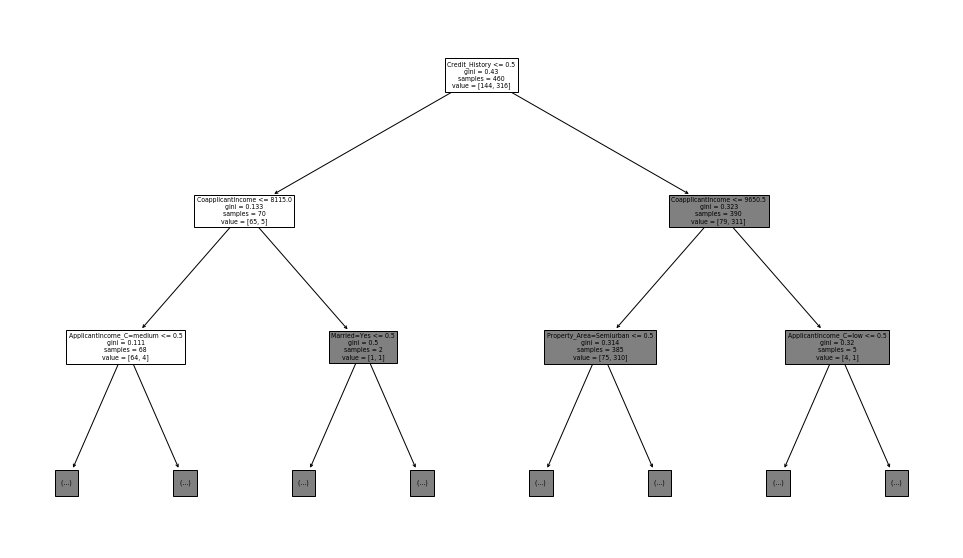

In [32]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(17,10)) ;
x = plot_tree(dt,max_depth = 2,feature_names = features);
plt.show()

<h2><i><b><center><font size="6" face="Ribbon" color="bronze">Selective Decision Tree</font></center></b></i></h2>

<h2><i><b><center><font size="4" face="Ribbon" color="black">Selecting features with 5% and above importance</font></center></b></i></h2>

In [33]:
features_dt1= ['ApplicantIncome',
 'ApplicantIncome_C=low',
 'CoapplicantIncome',
 'Credit_History',
 'Dependents=1',
 'Dependents=3+',
 'Gender=Female',
 'LoanAmount',
 'Loan_Amount_Term',
 'Loan_Amount_Term_C=high',
 'Married=No',
 'Property_Area=Rural',
 'Property_Area=Semiurban',
 'Self_Employed=No']

In [34]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train[features_dt1],y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h2><i><b><center><font size="5" face="Ribbon" color="bronze">Selective Decision Tree metrics</font></center></b></i></h2>

In [35]:
estimator= dt1
pred_bin_tr = estimator.predict(X_train[features_dt1])
pred_bin_te = estimator.predict(X_test[features_dt1])
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train[features_dt1])[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test[features_dt1])[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 1.0 ; test_roca : 0.6660770440251572'

'train_f1_s : 1.0 ; test_f1_s : 0.7999999999999999'

'train_prec : 1.0 ; test_prec : 0.7889908256880734'

'train_reca : 1.0 ; test_reca : 0.8113207547169812'

'train_accu : 1.0 ; test_accu : 0.7207792207792207'

'train_conf : [[144   0]\n [  0 316]] ; test_conf : [[25 23]\n [20 86]]'

<h2><i><b><center><font size="6" face="Ribbon" color="bronze">Random Forest</font></center></b></i></h2>

In [36]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

CPU times: user 166 ms, sys: 4.14 ms, total: 170 ms
Wall time: 171 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

h2><i><b><center><font size="5" face="Ribbon" color="bronze">Random Forest metrics</font></center></b></i></h2>

In [37]:
estimator= rf
pred_bin_tr = estimator.predict(X_train)
pred_bin_te = estimator.predict(X_test)
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train)[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test)[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 1.0 ; test_roca : 0.7577633647798743'

'train_f1_s : 1.0 ; test_f1_s : 0.8559322033898306'

'train_prec : 1.0 ; test_prec : 0.7769230769230769'

'train_reca : 1.0 ; test_reca : 0.9528301886792453'

'train_accu : 1.0 ; test_accu : 0.7792207792207793'

'train_conf : [[144   0]\n [  0 316]] ; test_conf : [[ 19  29]\n [  5 101]]'

h2><i><b><font size="5" face="Ribbon" color="black">Important features</font></b></i></h2>

In [38]:
dict(zip(features,100*rf.feature_importances_))

{'ApplicantIncome': 12.716327762606772,
 'ApplicantIncome_C=high': 0.9965725698924571,
 'ApplicantIncome_C=low': 1.6429073912615069,
 'ApplicantIncome_C=medium': 1.6189774256443645,
 'ApplicantIncome_C=very high': 0.26873794441286164,
 'ApplicantIncome_C=very low': 0.6320370785666827,
 'CoapplicantIncome': 8.424187472719332,
 'CoapplicantIncome_C=high': 0.7475930211813416,
 'CoapplicantIncome_C=low': 1.1349031702580097,
 'CoapplicantIncome_C=medium': 1.213735803699424,
 'CoapplicantIncome_C=very high': 0.5237915306471564,
 'CoapplicantIncome_C=very low': 1.3159104170565037,
 'Credit_History': 23.42317510298918,
 'Dependents=0': 1.8734773572916732,
 'Dependents=1': 1.8242971105259889,
 'Dependents=2': 1.3376671586657922,
 'Dependents=3+': 1.3535442566798725,
 'Education=Graduate': 1.5009328939183453,
 'Education=Not Graduate': 1.2947703859557242,
 'Gender=Female': 1.0479836007156214,
 'Gender=Male': 1.4756206918573644,
 'LoanAmount': 11.73341834152287,
 'LoanAmount_C=high': 0.3466029714

<h2><i><b><center><font size="6" face="Ribbon" color="bronze">Selective Random Forest</font></center></b></i></h2>

<h2><i><b><center><font size="4" face="Ribbon" color="black">Selecting features with 5% and above importance</font></center></b></i></h2>

In [39]:
feature_rf2 = ['ApplicantIncome',
 'ApplicantIncome_C=low',
 'ApplicantIncome_C=medium',
 'CoapplicantIncome',
 'CoapplicantIncome_C=low',
 'CoapplicantIncome_C=medium',
 'CoapplicantIncome_C=very low',
 'Credit_History',
 'Dependents=0',
 'Dependents=1',
 'Education=Graduate',
 'Education=Not Graduate',
 'Gender=Male',
 'LoanAmount',
 'LoanAmount_C=low',
 'LoanAmount_C=medium',
 'Loan_Amount_Term',
 'Loan_Amount_Term_C=high',
 'Loan_Amount_Term_C=medium',
 'Married=No',
 'Married=Yes',
 'Property_Area=Rural',
 'Property_Area=Semiurban',
 'Property_Area=Urban']

In [40]:
%%time
rf2 = RandomForestClassifier()
rf2.fit(X_train[feature_rf2], y_train)

CPU times: user 161 ms, sys: 3.48 ms, total: 164 ms
Wall time: 165 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<h2><i><b><center><font size="5" face="Ribbon" color="bronze">Selective Random Forest metrics</font></center></b></i></h2>

In [41]:
estimator= rf2
pred_bin_tr = estimator.predict(X_train[feature_rf2])
pred_bin_te = estimator.predict(X_test[feature_rf2])
f'train_roca : {roc_auc_score(y_train,estimator.predict_proba(X_train[feature_rf2])[:,1])} ; \
test_roca : {roc_auc_score(y_test,estimator.predict_proba(X_test[feature_rf2])[:,1])}'
f'train_f1_s : {f1_score(y_train,pred_bin_tr)} ; test_f1_s : {f1_score(y_test,pred_bin_te)}'
f'train_prec : {precision_score(y_train,pred_bin_tr)} ; test_prec : {precision_score(y_test,pred_bin_te)}'
f'train_reca : {recall_score(y_train,pred_bin_tr)} ; test_reca : {recall_score(y_test,pred_bin_te)}'
f'train_accu : {accuracy_score(y_train,pred_bin_tr)} ; test_accu : {accuracy_score(y_test,pred_bin_te)}'
f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_roca : 1.0 ; test_roca : 0.7629716981132075'

'train_f1_s : 1.0 ; test_f1_s : 0.8655462184873949'

'train_prec : 1.0 ; test_prec : 0.7803030303030303'

'train_reca : 1.0 ; test_reca : 0.9716981132075472'

'train_accu : 1.0 ; test_accu : 0.7922077922077922'

'train_conf : [[144   0]\n [  0 316]] ; test_conf : [[ 19  29]\n [  3 103]]'

<h2><i><b><center><font size="6" face="Ribbon" color="bronze">K fold cross validation</font></center></b></i></h2>

In [42]:
estimator = rf2
skf = StratifiedKFold(n_splits=5, shuffle = True,random_state = 51)
cv_result = cross_val_score(estimator=estimator, X=train[feature_rf2], y=train_data.Loan_Status, \
                                      cv=skf, scoring = 'f1')
cv_result
print("Full Accuracy: %0.2f(+/- %0.2f)" % (cv_result.mean(), cv_result.std()*2))

array([0.88764045, 0.84615385, 0.84782609, 0.82291667, 0.84745763])

Full Accuracy: 0.85(+/- 0.04)


<h2><i><b><center><font size="6" face="Ribbon" color="bronze">Mean score and 95% confidence interval of the score estimate</font></center></b></i></h2>

In [43]:
all_accuracies_data = cross_val_score(estimator=rf2, X=train[feature_rf2], y=train_data[target], cv=5,scoring = 'accuracy')
all_accuracies_data
print("Full accuracy: %0.3f(+/- %0.3f)" % (all_accuracies_data.mean(), all_accuracies_data.std()*2))

all_accuracies_data = cross_val_score(estimator=rf2, X=train[feature_rf2], y=train_data[target], cv=5,scoring = 'f1_macro')
all_accuracies_data
print("Full f1: %0.3f(+/- %0.3f)" % (all_accuracies_data.mean(), all_accuracies_data.std()*2))


all_accuracies_data = cross_val_score(estimator=rf2, X=train[feature_rf2], y=train_data[target], cv=5,scoring = 'precision_macro')
all_accuracies_data
print("Full precision: %0.3f(+/- %0.3f)" % (all_accuracies_data.mean(), all_accuracies_data.std()*2))

all_accuracies_data = cross_val_score(estimator=rf2, X=train[feature_rf2], y=train_data[target], cv=5,scoring = 'recall_macro')
all_accuracies_data
print("Full recall: %0.3f(+/- %0.3f)" % (all_accuracies_data.mean(), all_accuracies_data.std()*2))

array([0.81300813, 0.74796748, 0.77235772, 0.83739837, 0.77868852])

Full accuracy: 0.790(+/- 0.063)


array([0.75461879, 0.64605959, 0.69139785, 0.78400383, 0.70166119])

Full f1: 0.716(+/- 0.097)


array([0.75795918, 0.72191296, 0.77935223, 0.82171717, 0.70281795])

Full precision: 0.757(+/- 0.084)


array([0.73374613, 0.62987616, 0.66254579, 0.76007326, 0.69047619])

Full recall: 0.695(+/- 0.094)


<h2><i><b><center><font size="6" face="Ribbon" color="bronze">XGBoost</font></center></b></i></h2>

In [44]:
from xgboost import XGBClassifier

In [45]:
XGB = XGBClassifier()
XGB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
XGB.fit(X_train[features], y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

<h2><i><b><font size="5" face="Ribbon" color="black">Prediction on train data</font></b></i></h2>

In [47]:
pred_bin = XGB.predict(X_train)
precision_score(y_train,pred_bin)
recall_score(y_train,pred_bin)
confusion_matrix(y_train,pred_bin)
accuracy_score(y_train,pred_bin)

0.839142091152815

0.990506329113924

array([[ 84,  60],
       [  3, 313]])

0.8630434782608696

<h2><i><b><font size="5" face="Ribbon" color="black">Prediction on test data</font></b></i></h2>

In [48]:
pred_bin = XGB.predict(X_test)
precision_score(y_test,pred_bin)
recall_score(y_test,pred_bin)
confusion_matrix(y_test,pred_bin)
accuracy_score(y_test,pred_bin)

0.7703703703703704

0.9811320754716981

array([[ 17,  31],
       [  2, 104]])

0.7857142857142857

<h2><i><b><center><font size="5" face="Ribbon" color="black"></font>The mean score and the 95% confidence interval of the score estimate</b></i></h2></center>

In [49]:
all_accuracies_data = cross_val_score(estimator=XGB, X=train[features], y=train_data[target], cv=5,scoring = 'f1_macro')
all_accuracies_data
print("Full Accuracy: %0.2f(+/- %0.2f)" % (all_accuracies_data.mean(), all_accuracies_data.std()*2))

all_accuracies_data = cross_val_score(estimator=XGB, X=train[features], y=train_data[target], cv=5,scoring = 'precision_macro')
all_accuracies_data
print("Full Accuracy: %0.2f(+/- %0.2f)" % (all_accuracies_data.mean(), all_accuracies_data.std()*2))

all_accuracies_data = cross_val_score(estimator=XGB, X=train[features], y=train_data[target], cv=5,scoring = 'recall_macro')
all_accuracies_data
print("Full Accuracy: %0.2f(+/- %0.2f)" % (all_accuracies_data.mean(), all_accuracies_data.std()*2))

array([0.71456419, 0.67631579, 0.67669718, 0.79292929, 0.75688406])

Full Accuracy: 0.72(+/- 0.09)


array([0.8152834 , 0.77460317, 0.75849515, 0.84259259, 0.83681818])

Full Accuracy: 0.81(+/- 0.07)


array([0.69287926, 0.66068111, 0.66254579, 0.77106227, 0.73214286])

Full Accuracy: 0.70(+/- 0.08)
